# Example of quantum teleportation

In this example we will demostrate quantum teleportation (https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/teleportation.ipynb).

Alice will create two entabled qbits and she will send one to Bob. As both qbits are entagled both of them will be at the same quantum state.

In [1]:
# Do the necessary imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.circuit.library import Initialize
from qiskit.result import marginal_counts
from qiskit.quantum_info import random_statevector

def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    qc.h(a) # Put qubit a into state |+>
    qc.cx(a,b) # CNOT with a as control and b as target

def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

def measure_and_send(qc, a, b):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

# This function takes a QuantumCircuit (qc), integer (qubit)
# and ClassicalRegisters (crz & crx) to decide which gates to apply
def bob_gates(qc, qubit, crz, crx):
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit
    qc.x(qubit).c_if(crx, 1) # Apply gates if the registers 
    qc.z(qubit).c_if(crz, 1) # are in the state '1'

Alice create a random qubit:

<IPython.core.display.Latex object>

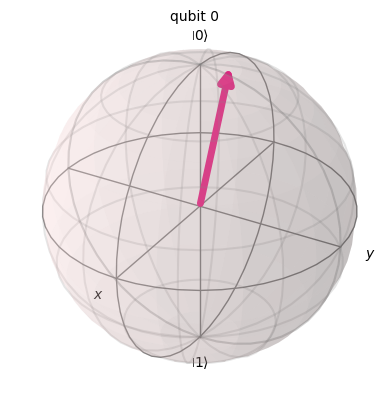

In [2]:
# Create random 1-qubit state
psi = random_statevector(2)

# Display it nicely
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))

# Show it on a Bloch sphere
plot_bloch_multivector(psi)

Alice will perform the following:

1. Initialize the qbit **q0** with her random qbit,
2. Create two entagled qbits, **q1** and **q2**.
3. Alice copy her qbit **q0** to **q1**.
4. Alice send **q2** to Bob

In [3]:
init_gate = Initialize(psi)
init_gate.label = "init"
inverse_init_gate = init_gate.gates_to_uncompute()

## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## STEP 0
# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)

## STEP 3
# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)

Bob decodes the **q2** qbit:

In [4]:
## STEP 4
# Bob decodes qubits
bob_gates(qc, 2, crz, crx)

# Display the circuit
qc.draw()

/tmp/ipykernel_800/1586578741.py:31: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.x(qubit).c_if(crx, 1) # Apply gates if the registers
/tmp/ipykernel_800/1586578741.py:32: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.z(qubit).c_if(crz, 1) # are in the state '1'


┌────────────────────────────────────────────┐ ░            ░      ┌───┐»
  q_0: ┤ init(-0.63038-0.77015j,0.097185+0.006498j) ├─░────────────░───■──┤ H ├»
       └────────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘»
  q_1: ───────────────────────────────────────────────░─┤ H ├──■───░─┤ X ├─────»
                                                      ░ └───┘┌─┴─┐ ░ └───┘     »
  q_2: ───────────────────────────────────────────────░──────┤ X ├─░───────────»
                                                      ░      └───┘ ░           »
crz: 1/════════════════════════════════════════════════════════════════════════»
                                                                               »
crx: 1/════════════════════════════════════════════════════════════════════════»
                                                                               »
«        ░ ┌─┐                 
«  q_0: ─░─┤M├─────────────────
«        ░ └╥┘┌─┐              
«  q_1: ─░──╫─┤M├──────────────
«        ░  ║ └╥┘ ┌───┐  ┌───┐ 
«  q_2: ─░──╫──╫──┤ X ├──┤ Z ├─
«        ░  ║  ║  └─╥─┘  └─╥─┘ 
«           ║  ║    ║   ┌──╨──┐
«crz: 1/════╩══╬════╬═══╡ 0x1 ╞
«           0  ║ ┌──╨──┐└─────┘
«crx: 1/═══════╩═╡ 0x1 ╞═══════
«              0 └─────┘

We add the initial quantum gates used to initialize the qbit **q0** to the random qbit Alice sent to Bob:

In [5]:
## STEP 5
# reverse the initialization process
qc.append(inverse_init_gate, [2])

# Display the circuit
qc.draw()

┌────────────────────────────────────────────┐ ░            ░      ┌───┐»
  q_0: ┤ init(-0.63038-0.77015j,0.097185+0.006498j) ├─░────────────░───■──┤ H ├»
       └────────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘»
  q_1: ───────────────────────────────────────────────░─┤ H ├──■───░─┤ X ├─────»
                                                      ░ └───┘┌─┴─┐ ░ └───┘     »
  q_2: ───────────────────────────────────────────────░──────┤ X ├─░───────────»
                                                      ░      └───┘ ░           »
crz: 1/════════════════════════════════════════════════════════════════════════»
                                                                               »
crx: 1/════════════════════════════════════════════════════════════════════════»
                                                                               »
«        ░ ┌─┐                                          
«  q_0: ─░─┤M├──────────────────────────────────────────
«        ░ └╥┘┌─┐                                       
«  q_1: ─░──╫─┤M├───────────────────────────────────────
«        ░  ║ └╥┘ ┌───┐  ┌───┐ ┌───────────────────────┐
«  q_2: ─░──╫──╫──┤ X ├──┤ Z ├─┤ isometry_to_uncompute ├
«        ░  ║  ║  └─╥─┘  └─╥─┘ └───────────────────────┘
«           ║  ║    ║   ┌──╨──┐                         
«crz: 1/════╩══╬════╬═══╡ 0x1 ╞═════════════════════════
«           0  ║ ┌──╨──┐└─────┘                         
«crx: 1/═══════╩═╡ 0x1 ╞════════════════════════════════
«              0 └─────┘

Adding a new classical register:

In [6]:
# Need to add a new ClassicalRegister
# to see the result
cr_result = ClassicalRegister(1)
qc.add_register(cr_result)
qc.measure(2,2)
qc.draw()

┌────────────────────────────────────────────┐ ░            ░      ┌───┐»
  q_0: ┤ init(-0.63038-0.77015j,0.097185+0.006498j) ├─░────────────░───■──┤ H ├»
       └────────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘»
  q_1: ───────────────────────────────────────────────░─┤ H ├──■───░─┤ X ├─────»
                                                      ░ └───┘┌─┴─┐ ░ └───┘     »
  q_2: ───────────────────────────────────────────────░──────┤ X ├─░───────────»
                                                      ░      └───┘ ░           »
crz: 1/════════════════════════════════════════════════════════════════════════»
                                                                               »
crx: 1/════════════════════════════════════════════════════════════════════════»
                                                                               »
 c0: 1/════════════════════════════════════════════════════════════════════════»
                                                                               »
«        ░ ┌─┐                                             
«  q_0: ─░─┤M├─────────────────────────────────────────────
«        ░ └╥┘┌─┐                                          
«  q_1: ─░──╫─┤M├──────────────────────────────────────────
«        ░  ║ └╥┘ ┌───┐  ┌───┐ ┌───────────────────────┐┌─┐
«  q_2: ─░──╫──╫──┤ X ├──┤ Z ├─┤ isometry_to_uncompute ├┤M├
«        ░  ║  ║  └─╥─┘  └─╥─┘ └───────────────────────┘└╥┘
«           ║  ║    ║   ┌──╨──┐                          ║ 
«crz: 1/════╩══╬════╬═══╡ 0x1 ╞══════════════════════════╬═
«           0  ║ ┌──╨──┐└─────┘                          ║ 
«crx: 1/═══════╩═╡ 0x1 ╞═════════════════════════════════╬═
«              0 └─────┘                                 ║ 
« c0: 1/═════════════════════════════════════════════════╩═
«                                                        0

Performing simutations (10240):

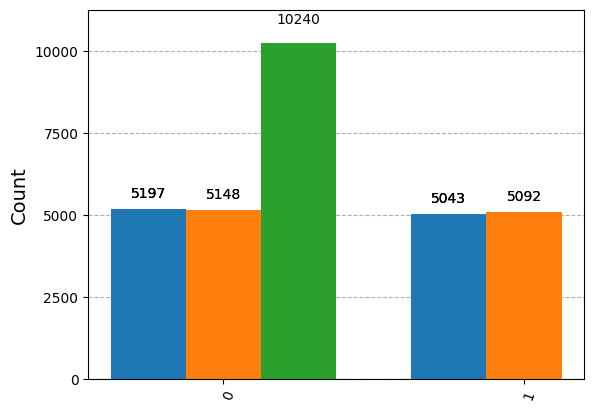

In [7]:
sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, sim)
t_qc.save_statevector()
counts = sim.run(t_qc,shots=10240).result().get_counts()
qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(3)]
plot_histogram(qubit_counts)

We can see that all the times, 10240 simulations, the qbit **q2** (the one which was sent to Bob), is in the state **|0>** which is the expected result indicating that the teleportation worker properly.

Qbit **q2** was initially initialized to **|0>** so running the inverse procese and measuring always the initial value shows that teleportation works.